<a href="https://colab.research.google.com/github/Afitr06/backpropagatin3/blob/main/predikat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# import packages
import pandas as pd
import numpy as np

In [22]:
#memasukan data
predikat = pd.read_csv ('data.csv')
predikat
# membaca 5 data

predikat.head()

,NPM,Nama Lengkap,IPK1,IPK2,IPK3,IPK4,IPK5,IPK6,IPK7,IPK8,Status
0,1706003,Adam Fakhrul Rozi,3.04,3.14,2.94,2.93,2.93,2.99,3.02,3.08,L
1,1706004,Rival Firmansyah,3.10,3.10,3.11,3.06,3.08,3.13,3.18,3.25,L
2,1706005,Ihsan Nugraha,3.92,3.89,3.86,3.83,3.86,3.86,3.86,3.87,L
3,1706007,Rizky Safta Maolani,3.57,3.49,3.41,3.35,3.43,3.43,3.45,3.47,L
4,1706009,Abdul Kamaludin,3.10,3.30,3.21,3.25,3.32,3.37,3.39,3.44,L


In [23]:
# melihat data yang akan di gunakan
predikat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NPM           100 non-null    int64  
 1   Nama Lengkap  100 non-null    object 
 2   IPK1          100 non-null    float64
 3   IPK2          100 non-null    float64
 4   IPK3          100 non-null    float64
 5   IPK4          100 non-null    float64
 6   IPK5          100 non-null    float64
 7   IPK6          100 non-null    float64
 8   IPK7          99 non-null     float64
 9   IPK8          98 non-null     float64
 10  Status        100 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 8.7+ KB


In [24]:
# menentukan variable
x = predikat.iloc[:,2:7]
x.head()

,IPK1,IPK2,IPK3,IPK4,IPK5
0,3.04,3.14,2.94,2.93,2.93
1,3.10,3.10,3.11,3.06,3.08
2,3.92,3.89,3.86,3.83,3.86
3,3.57,3.49,3.41,3.35,3.43
4,3.10,3.30,3.21,3.25,3.32


In [25]:
# Menentukan variable independen
y = predikat["IPK8"]
y.head()

0    3.08
1    3.25
2    3.87
3    3.47
4    3.44
Name: IPK8, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# Hasil dari pembagian dataset
kalkulasi_train = y_train.value_counts()
kalkulasi_test = y_test.value_counts()
print("Total data latih : \n", kalkulasi_train)
print("Total data tes : \n", kalkulasi_test)

Total data latih : 
 3.57    4
3.60    3
3.72    3
3.45    3
3.26    3
3.32    2
3.19    2
3.83    2
3.51    2
3.33    2
3.37    2
3.28    2
3.56    2
3.66    2
3.63    2
3.65    2
3.40    2
3.29    2
3.21    1
4.00    1
3.08    1
3.42    1
3.24    1
3.79    1
3.82    1
3.69    1
3.41    1
3.68    1
3.87    1
3.49    1
3.52    1
3.25    1
3.34    1
3.92    1
3.43    1
3.47    1
3.16    1
3.78    1
3.73    1
3.14    1
3.38    1
2.00    1
2.14    1
3.39    1
3.76    1
3.02    1
3.44    1
3.07    1
3.54    1
3.06    1
3.50    1
3.58    1
3.35    1
3.75    1
Name: IPK8, dtype: int64
Total data tes : 
 3.42    2
3.68    2
3.71    1
3.36    1
3.29    1
3.38    1
3.44    1
2.90    1
3.67    1
3.08    1
3.32    1
3.47    1
3.88    1
3.63    1
3.34    1
3.62    1
3.55    1
3.75    1
Name: IPK8, dtype: int64


In [27]:
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

# Add model for Neural Network
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(8, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 48        
                                                                 
 dense_10 (Dense)            (None, 2)                 18        
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [28]:
# run model
history = model.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/10
8/8 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/10
8/8 [===

In [29]:
# Check the Accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.0000
Testing Accuracy:  0.0000


In [30]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

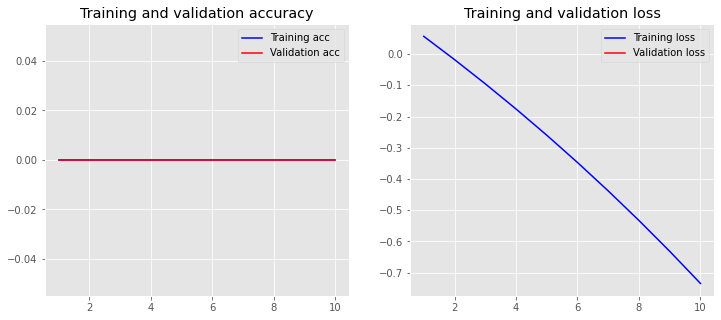

In [17]:
plot_history(history)

In [31]:
def get_predikat(ipk):
    if ipk >= 3.5:
        return 'Sangat Baik'
    elif 3.0 <= ipk < 3.5:
        return 'Baik'
    elif 2.5 <= ipk < 3.0:
        return 'Cukup'
    else:
        return 'Kurang'
